In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
covid_df=pd.read_csv('owid-covid-data.csv')

In [2]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [13]:
print(covid_df['date'].dtype)

datetime64[ns]


In [214]:
# 2 )il numero di casi fin dall'inizio della pandemia e la percentuale
import pandas as pd
#covid_df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
start_date = pd.to_datetime("2020-01-30") # https://it.wikipedia.org/wiki/Pandemia_di_COVID-19
tot_case_init = covid_df[covid_df["date"] == start_date]["total_cases"].sum()
print(f"Data d'inizio pandemia ({start_date}): ", tot_case_init)
tot_world = tot_cont.sum()
perc_cont = (tot_cont / tot_world * 100).round(2)
# 5. Report finale
report = pd.DataFrame({
    "totale_casi": tot_cont.astype(int),
    "percentuale": perc_cont
})
print(report)


Data d'inizio pandemia (2020-01-30 00:00:00):  8136.0
               totale_casi  percentuale
continent                              
North America    103436829        35.03
Asia              99373219        33.66
Europe            38997490        13.21
South America     37511921        12.70
Oceania           11861161         4.02
Africa             4072765         1.38


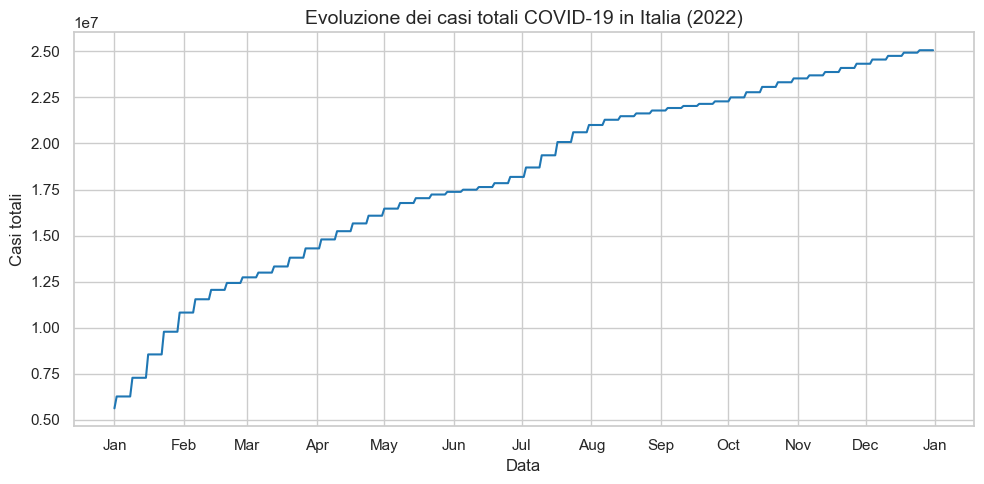

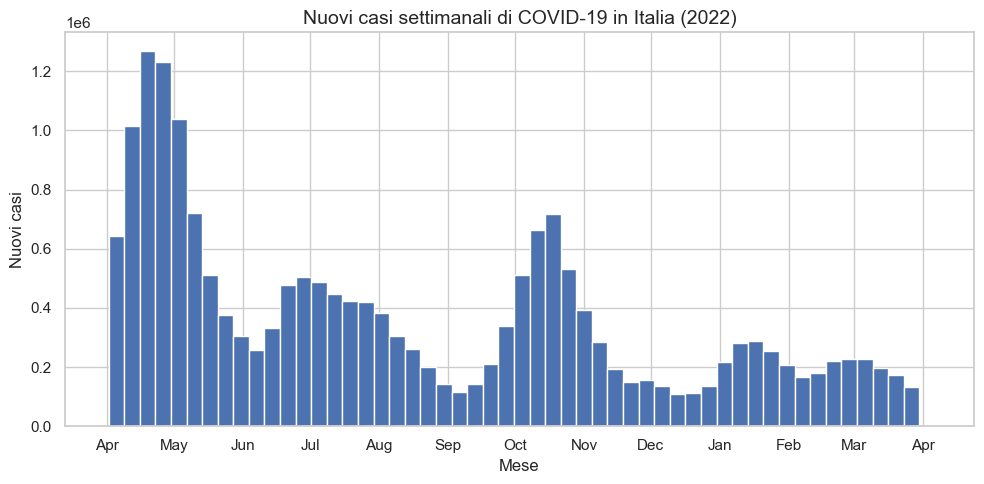

In [244]:
# 3 Selezionare i dati relativi all'Italia nel 2022
covid_df["date"] = pd.to_datetime(covid_df["date"])
df_it = covid_df[covid_df["location"] == "Italy"]
df_it_22 = df_it[df_it["date"].dt.year == 2022]
df_it_22 = df_it_22.dropna(subset=["new_cases"])

# Evoluzione dei casi totali COVID-19 in Italia (2022)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_it_22["date"], df_it_22["total_cases"], color="tab:blue")
ax.set_title("Evoluzione dei casi totali COVID-19 in Italia (2022)", fontsize=14)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Casi totali", fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()
plt.show()


# Nuovi casi settimanali di COVID-19 in Italia (2022)
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_it_22.index, df_it_22["new_cases"], width=7, align='center')
ax.set_title("Nuovi casi settimanali di COVID-19 in Italia (2022)", fontsize=14)
ax.set_xlabel("Mese", fontsize=12)
ax.set_ylabel("Nuovi casi", fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()
plt.show()


/var/folders/k7/r1m37jc10gx_kljmb4m11fs40000gn/T/ipykernel_6622/2359890894.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=countries)


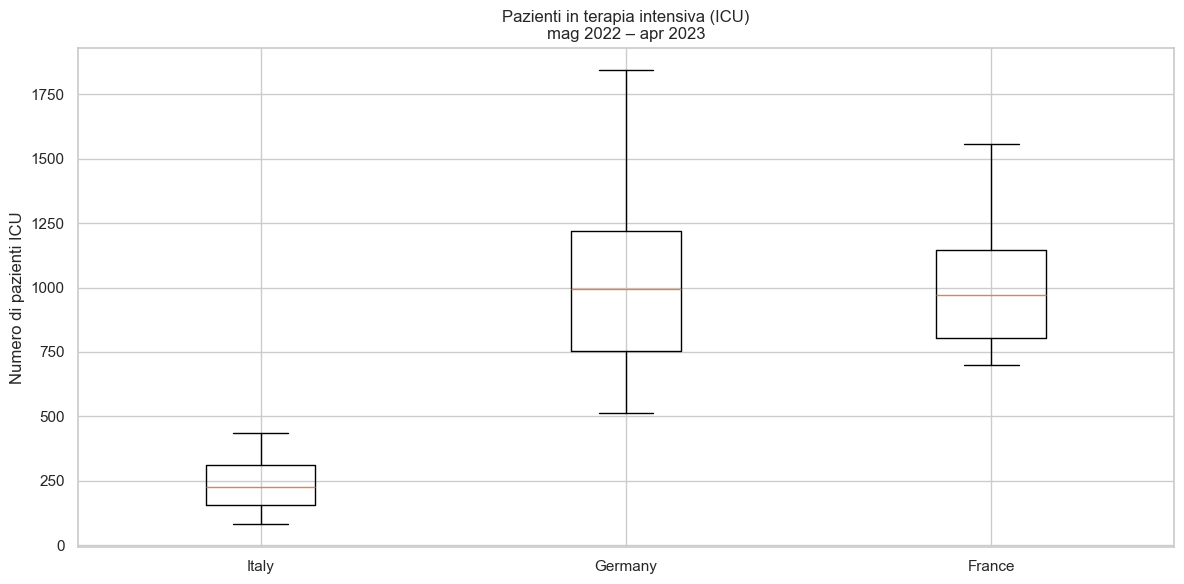

' \nDal grafico emerge che la Germania presenta sia la mediana più alta che la variabilità maggiore di pazienti \nin terapia intensiva fra maggio 2022 e aprile 2023, seguita dalla Francia con valori lievemente inferiori.\nL’Italia mostra numeri molto più contenuti e minor dispersione, indicando minore pressione sulle ICU nel periodo considerato.\n'

In [251]:
#4
countries = ["Italy", "Germany", "France"]
start_dt = "2022-05-01"
end_dt   = "2023-04-30"
filters = (
    covid_df["location"].isin(countries) &
    (covid_df["date"] >= start_dt) &
    (covid_df["date"] <= end_dt)
)
df_icu = (
    covid_df.loc[filters, ["location", "icu_patients"]]
    .dropna(subset=["icu_patients"]) 
    # Se non utilizziamo .dropna(subset=["icu_patients"]), tutte le righe con icu_patients = NaN
# restano nel DataFrame. Poiché molte righe per la Francia hanno icu_patients = NaN,
# nel preview (head/tail) non appaiono record “France” e sembra che siano scomparse.
)

data=[]
for c in countries:
    data.append( df_icu.loc[df_icu["location"] == c, "icu_patients"] )

plt.figure()
plt.boxplot(data, labels=countries)
plt.title("Pazienti in terapia intensiva (ICU)\nmag 2022 – apr 2023")
plt.ylabel("Numero di pazienti ICU")
plt.tight_layout()
plt.show()
''' 
Dal grafico emerge che la Germania presenta sia la mediana più alta che la variabilità maggiore di pazienti 
in terapia intensiva fra maggio 2022 e aprile 2023, seguita dalla Francia con valori lievemente inferiori.
L’Italia mostra numeri molto più contenuti e minor dispersione, indicando minore pressione sulle ICU nel periodo considerato.
'''




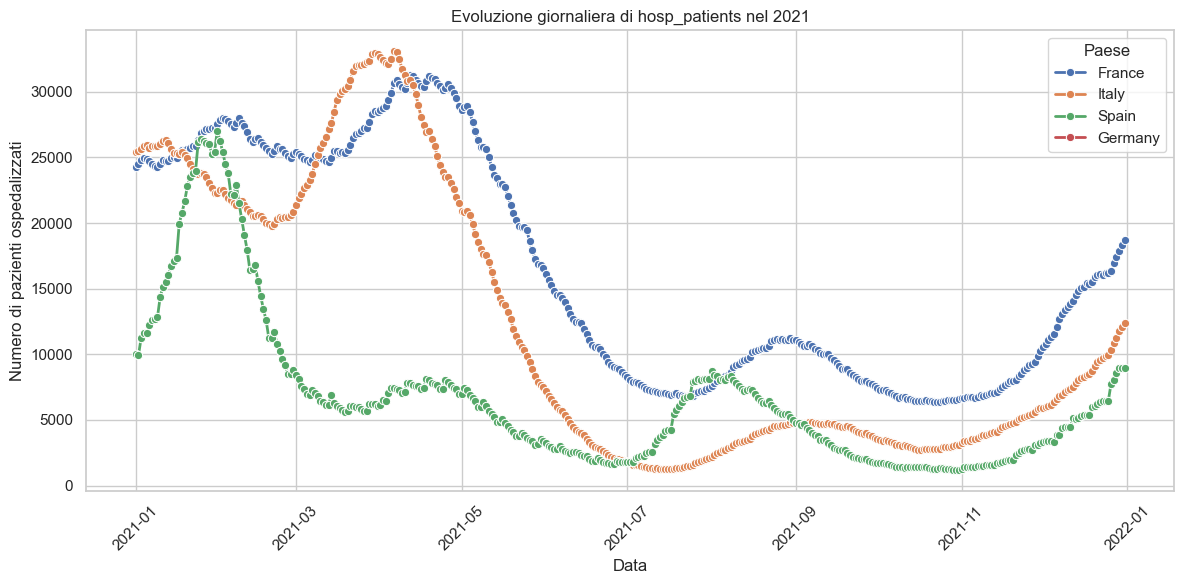

In [198]:
#5
filters_hosp_2021= (
    covid_df["location"].isin(["Italy", "Germany", "France", "Spain"]) &
    (covid_df["date"].dt.year == 2021)
)

df_hosp_2021 = covid_df.loc[filters_hosp_2021, ["date", "location", "hosp_patients"]].sort_values("date")

sns.set(style="whitegrid", rc={"figure.figsize": (12, 6)})

sns.lineplot(
    data=df_hosp_2021,
    x="date",
    y="hosp_patients",
    hue="location",
    marker="o",         # disegna un punto per ogni data
    linewidth=2
)

plt.title("Evoluzione giornaliera di hosp_patients nel 2021")
plt.xlabel("Data")
plt.ylabel("Numero di pazienti ospedalizzati")
plt.legend(title="Paese")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Stock hosp_patients a fine 2020 e fine 2021:
year      stock_2020  stock_2021  delta_21_vs_20
location                                        
France       24407.0     18715.0         -5692.0
Germany          NaN         NaN             NaN
Italy        25706.0     12410.0        -13296.0
Spain         9491.0      8976.0          -515.0 

Null in ‘hosp_patients’ nel 2021: 365 su 1460 righe (25.00%).



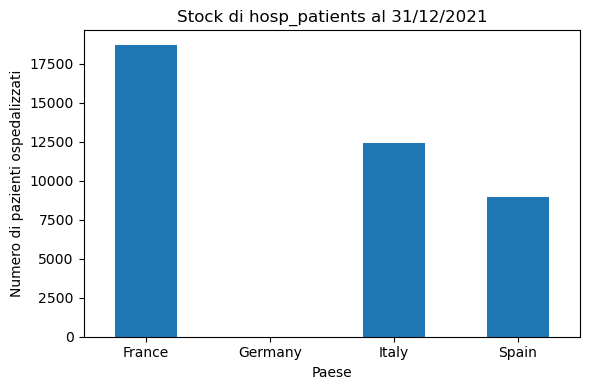

In [114]:
'''Commento: France, Italy e Spain presentano ciascuna alcuni NaN (≈25% dei giorni), 
i quali possono essere gestiti con interpolazione lineare o forward‐fill senza 
alterare significativamente la serie;  
 Germany non riporta alcun valore in ospedale (tutti NaN → somma 0), 
perciò va esclusa o integrata tramite fonte esterna.'''
